In [1]:
import numpy as np
from sklearn.datasets import load_iris

In [2]:
class MyKMeans:
    def __init__(self, n_cluster=3, random_state=666666):
        self.cluster_centers_ = None
        self.n_cluster = n_cluster
        self.labels_ = None
        if random_state:
            np.random.seed(random_state)
        
        
    def fit(self,x_train):
        choice = np.random.choice(len(x_train), 
                                         self.n_cluster, 
                                         replace=False)
        self.cluster_centers_ = x_train[choice]
        last_centroid = self.cluster_centers_ + 10
       
        #质心没什么变化后就停止
        while np.sum(np.absolute(self.cluster_centers_ - last_centroid)) > 0.000001 : 
            last_centroid = self.cluster_centers_
            label = []
            for data in x_train:
                near = float('inf')
                flag = 0
                for i,ch in enumerate(self.cluster_centers_):
                    dis = np.sqrt(np.sum((ch - data)**2))
                    if dis < near:
                        near = dis
                        flag = i
                label.append(flag)
            
            for i in range(self.n_cluster):
                new_centroid = np.zeros(2)
                cnt = 0
                for index, data in enumerate(x_train):
                    if label[index] == i:
                        cnt += 1
                        new_centroid += data
                new_centroid /= cnt
                self.cluster_centers_[i] = new_centroid
        self.labels_ = np.array(label)
        return self
    
    def predict(self,x_test):
        label = []
        for data in x_test:
            near = float('inf')
            flag = 0
            for i,ch in enumerate(self.cluster_centers_):
                dis = np.sqrt(np.sum((ch - data)**2))
                if dis < near:
                    near = dis
                    flag = i
            label.append(flag)
        return np.array(label)
    
    def __repr__(self):
        return "KMeans(n_cluster={})".format(self.n_cluster)
    

In [3]:
iris = load_iris()
x = iris.data
x = x[:,:2]
y = iris.target

In [4]:
km = MyKMeans(3)
km.fit(x)

KMeans(n_cluster=3)

In [5]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 0, 2, 2, 0, 1, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
km.cluster_centers_

array([[7.43846154, 3.13076923],
       [5.13472222, 3.18611111],
       [6.30923077, 2.9       ]])

In [7]:
y_pred = km.predict(x)

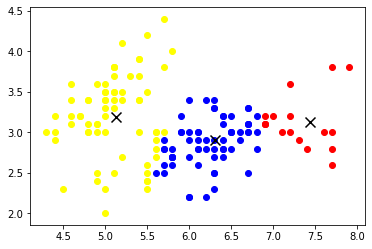

In [9]:
import matplotlib.pyplot as plt
plt.scatter(x[y_pred==0,0],x[y_pred==0,1],color='red')
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],color='yellow')
plt.scatter(x[y_pred==2,0],x[y_pred==2,1],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],
            s=100,marker='x',color='black')
plt.show()